In [ ]:
# Import important library
import pandas as pd
import re
import numpy

file_name = "M920131.csv"

# Read raw file
df = pd.read_csv(file_name)
print("Preview first 20 rows:")
print(df.head(20))

Preview first 20 rows:
                                           Unnamed: 0  Unnamed: 1  Unnamed: 2  \
0                             Theme: Economy & Prices         NaN         NaN   
1   Subject: Labour, Employment, Wages and Product...         NaN         NaN   
2             Topic: Wages and Income from Employment         NaN         NaN   
3   Table Title: Median Gross Monthly Income From ...         NaN         NaN   
4                                                 NaN         NaN         NaN   
5                       Data last updated: 25/03/2024         NaN         NaN   
6                        Source: MINISTRY OF MANPOWER         NaN         NaN   
7                                                 NaN         NaN         NaN   
8                                                 NaN         NaN         NaN   
9                                         Data Series      2023.0      2022.0   
10  Managers & Administrators (Including Working P...     11297.0     10586.0   
11  M

In [ ]:
# Drop the first 9 rows
df = df.drop(index=range(0, 9)).reset_index(drop=True)
print("\nPreview after dropping first 10 rows:")
print(df.head(10))


Preview after dropping first 10 rows:
                                          Unnamed: 0  Unnamed: 1  Unnamed: 2  \
0                                        Data Series      2023.0      2022.0   
1  Managers & Administrators (Including Working P...     11297.0     10586.0   
2  Managers & Administrators (Including Working P...     10020.0      9800.0   
3                               Professionals - Male      8620.0      8190.0   
4                             Professionals - Female      7520.0      7220.0   
5       Associate Professionals & Technicians - Male      4680.0      4563.0   
6     Associate Professionals & Technicians - Female      4680.0      4437.0   
7                    Clerical Support Workers - Male      3194.0      2984.0   
8                  Clerical Support Workers - Female      3413.0      3296.0   
9                     Service & Sales Workers - Male      3038.0      3042.0   

   Unnamed: 3  Unnamed: 4  Unnamed: 5  Unnamed: 6  Unnamed: 7  Unnamed: 8  \
0  

In [ ]:
# Preview the last 50 rows to see the file structure
print("\nPreview last 50 rows:")
print(df.tail(50))


Preview last 50 rows:
                                           Unnamed: 0  Unnamed: 1  Unnamed: 2  \
0                                         Data Series      2023.0      2022.0   
1   Managers & Administrators (Including Working P...     11297.0     10586.0   
2   Managers & Administrators (Including Working P...     10020.0      9800.0   
3                                Professionals - Male      8620.0      8190.0   
4                              Professionals - Female      7520.0      7220.0   
5        Associate Professionals & Technicians - Male      4680.0      4563.0   
6      Associate Professionals & Technicians - Female      4680.0      4437.0   
7                     Clerical Support Workers - Male      3194.0      2984.0   
8                   Clerical Support Workers - Female      3413.0      3296.0   
9                      Service & Sales Workers - Male      3038.0      3042.0   
10                   Service & Sales Workers - Female      2535.0      2409.0   
11   

In [ ]:
# Keep only the first 17 rows (based on inspection)
df = df.iloc[:17].reset_index(drop=True)
df

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21
0,Data Series,2023.0,2022.0,2021.0,2020.0,2019.0,2018.0,2017.0,2016.0,2015.0,...,2012.0,2011.0,2010.0,2009.0,2008.0,2007.0,2004.0,2003.0,2002.0,2001
1,Managers & Administrators (Including Working P...,11297.0,10586.0,9975.0,10075.0,10190.0,10146.0,9556.0,9304.0,9025.0,...,7500.0,7000.0,6081.0,5934.0,6000.0,5400.0,4896.0,5000.0,5000.0,4930
2,Managers & Administrators (Including Working P...,10020.0,9800.0,9251.0,9800.0,9421.0,9583.0,9020.0,9020.0,8425.0,...,6938.0,6485.0,5582.0,5353.0,5769.0,5085.0,4896.0,4776.0,4640.0,4736
3,Professionals - Male,8620.0,8190.0,7371.0,7371.0,7805.0,7605.0,7605.0,7220.0,7103.0,...,6000.0,5835.0,5344.0,5344.0,5344.0,4896.0,4520.0,4640.0,4640.0,4640
4,Professionals - Female,7520.0,7220.0,6542.0,6435.0,6580.0,6435.0,6338.0,6201.0,6139.0,...,5041.0,4879.0,4617.0,4509.0,4351.0,3955.0,3673.0,3770.0,3770.0,3770
5,Associate Professionals & Technicians - Male,4680.0,4563.0,4212.0,4241.0,4563.0,4437.0,4374.0,4183.0,4095.0,...,3770.0,3500.0,3221.0,3221.0,3396.0,3060.0,3051.0,3132.0,3132.0,3141
6,Associate Professionals & Technicians - Female,4680.0,4437.0,4095.0,4095.0,4307.0,4182.0,4095.0,4022.0,3990.0,...,3654.0,3503.0,3101.0,3263.0,3263.0,2862.0,2816.0,2706.0,2842.0,2706
7,Clerical Support Workers - Male,3194.0,2984.0,2905.0,2662.0,2779.0,2691.0,2662.0,2535.0,2535.0,...,2354.0,2252.0,2138.0,2110.0,2138.0,2034.0,1845.0,2030.0,2088.0,1972
8,Clerical Support Workers - Female,3413.0,3296.0,3066.0,2916.0,3060.0,2983.0,2936.0,2825.0,2862.0,...,2597.0,2470.0,2420.0,2357.0,2353.0,2184.0,2034.0,2088.0,2088.0,2103
9,Service & Sales Workers - Male,3038.0,3042.0,2925.0,2633.0,2849.0,2662.0,2535.0,2500.0,2340.0,...,2128.0,2002.0,1984.0,1832.0,1861.0,1713.0,1695.0,1740.0,1740.0,1740


In [ ]:
# Use the first row as header
df.columns = df.iloc[0]
df = df.drop(0).reset_index(drop=True)

print("\nData after setting header row:")
print(df)


Data after setting header row:
0                                         Data Series   2023.0   2022.0  \
0   Managers & Administrators (Including Working P...  11297.0  10586.0   
1   Managers & Administrators (Including Working P...  10020.0   9800.0   
2                                Professionals - Male   8620.0   8190.0   
3                              Professionals - Female   7520.0   7220.0   
4        Associate Professionals & Technicians - Male   4680.0   4563.0   
5      Associate Professionals & Technicians - Female   4680.0   4437.0   
6                     Clerical Support Workers - Male   3194.0   2984.0   
7                   Clerical Support Workers - Female   3413.0   3296.0   
8                      Service & Sales Workers - Male   3038.0   3042.0   
9                    Service & Sales Workers - Female   2535.0   2409.0   
10          Craftsmen & Related Trades Workers - Male   3000.0   2890.0   
11        Craftsmen & Related Trades Workers - Female   2319.0   215

In [ ]:
# Preview column name
print(df.columns)

# Standardize the column name
clean_column = []
for c in df.columns:
    text = str(c).strip()
    match = re.search(r"(19|20)\d{2}", text)
    if match:
        clean_column.append(match.group(0))
    else:
        clean_column.append(text)

df.columns = clean_column
print(df.columns)


Index(['Data Series',        2023.0,        2022.0,        2021.0,
              2020.0,        2019.0,        2018.0,        2017.0,
              2016.0,        2015.0,        2014.0,        2013.0,
              2012.0,        2011.0,        2010.0,        2009.0,
              2008.0,        2007.0,        2004.0,        2003.0,
              2002.0,       '2001 '],
      dtype='object', name=0)
Index(['Data Series', '2023', '2022', '2021', '2020', '2019', '2018', '2017',
       '2016', '2015', '2014', '2013', '2012', '2011', '2010', '2009', '2008',
       '2007', '2004', '2003', '2002', '2001'],
      dtype='object')


In [ ]:
# Split age group and occupation category
gender, occupation = [], []

for raw_val in df["Data Series"].fillna("").astype(str):
    s = raw_val.strip()
    if s == "":
      age_group.append(np.nan)
      occupation.append(np.nan)
      continue
    if 'Male' in s:
      occupation.append(s.split(" - ")[0])
      gender.append('Male')
    elif 'Female' in s:
      occupation.append(s.split(" - ")[0])
      gender.append('Female')
    else:
      continue

In [ ]:
# Build cleaned dataset
clean_data = df.copy()
clean_data.insert(0, "occupation", occupation)
clean_data.insert(1, "gender", gender)

# Drop "Data Series" column
clean_data = clean_data.drop(columns=["Data Series"])
clean_data

,occupation,gender,2023,2022,2021,2020,2019,2018,2017,2016,...,2012,2011,2010,2009,2008,2007,2004,2003,2002,2001
0,Managers & Administrators (Including Working P...,Male,11297.0,10586.0,9975.0,10075.0,10190.0,10146.0,9556.0,9304.0,...,7500.0,7000.0,6081.0,5934.0,6000.0,5400.0,4896.0,5000.0,5000.0,4930
1,Managers & Administrators (Including Working P...,Female,10020.0,9800.0,9251.0,9800.0,9421.0,9583.0,9020.0,9020.0,...,6938.0,6485.0,5582.0,5353.0,5769.0,5085.0,4896.0,4776.0,4640.0,4736
2,Professionals,Male,8620.0,8190.0,7371.0,7371.0,7805.0,7605.0,7605.0,7220.0,...,6000.0,5835.0,5344.0,5344.0,5344.0,4896.0,4520.0,4640.0,4640.0,4640
3,Professionals,Female,7520.0,7220.0,6542.0,6435.0,6580.0,6435.0,6338.0,6201.0,...,5041.0,4879.0,4617.0,4509.0,4351.0,3955.0,3673.0,3770.0,3770.0,3770
4,Associate Professionals & Technicians,Male,4680.0,4563.0,4212.0,4241.0,4563.0,4437.0,4374.0,4183.0,...,3770.0,3500.0,3221.0,3221.0,3396.0,3060.0,3051.0,3132.0,3132.0,3141
5,Associate Professionals & Technicians,Female,4680.0,4437.0,4095.0,4095.0,4307.0,4182.0,4095.0,4022.0,...,3654.0,3503.0,3101.0,3263.0,3263.0,2862.0,2816.0,2706.0,2842.0,2706
6,Clerical Support Workers,Male,3194.0,2984.0,2905.0,2662.0,2779.0,2691.0,2662.0,2535.0,...,2354.0,2252.0,2138.0,2110.0,2138.0,2034.0,1845.0,2030.0,2088.0,1972
7,Clerical Support Workers,Female,3413.0,3296.0,3066.0,2916.0,3060.0,2983.0,2936.0,2825.0,...,2597.0,2470.0,2420.0,2357.0,2353.0,2184.0,2034.0,2088.0,2088.0,2103
8,Service & Sales Workers,Male,3038.0,3042.0,2925.0,2633.0,2849.0,2662.0,2535.0,2500.0,...,2128.0,2002.0,1984.0,1832.0,1861.0,1713.0,1695.0,1740.0,1740.0,1740
9,Service & Sales Workers,Female,2535.0,2409.0,2340.0,2195.0,2340.0,2260.0,2125.0,2017.0,...,1700.0,1625.0,1500.0,1472.0,1381.0,1356.0,1243.0,1300.0,1276.0,1256


In [ ]:
year_cols = clean_data.iloc[:, 2:].columns

clean_data = clean_data[clean_data["occupation"] != "Total (All Occupations)"]

# melt with those columns
df = clean_data.melt(
    id_vars=["gender", "occupation"],
    value_vars=year_cols,
    var_name="year",
    value_name="value"
)

df["year"] = df["year"].astype(int)
df["value"] = pd.to_numeric(df["value"], errors="coerce")

In [ ]:
df.to_csv("salary.csv", index=False)

# Data Exploration

In [ ]:
print(df)

     gender                                         occupation  year    value
0      Male  Managers & Administrators (Including Working P...  2023  11297.0
1    Female  Managers & Administrators (Including Working P...  2023  10020.0
2      Male                                      Professionals  2023   8620.0
3    Female                                      Professionals  2023   7520.0
4      Male              Associate Professionals & Technicians  2023   4680.0
..      ...                                                ...   ...      ...
331  Female                 Craftsmen & Related Trades Workers  2001   1256.0
332    Male             Plant & Machine Operators & Assemblers  2001   1734.0
333  Female             Plant & Machine Operators & Assemblers  2001   1148.0
334    Male              Cleaners, Labourers & Related Workers  2001   1160.0
335  Female              Cleaners, Labourers & Related Workers  2001    928.0

[336 rows x 4 columns]


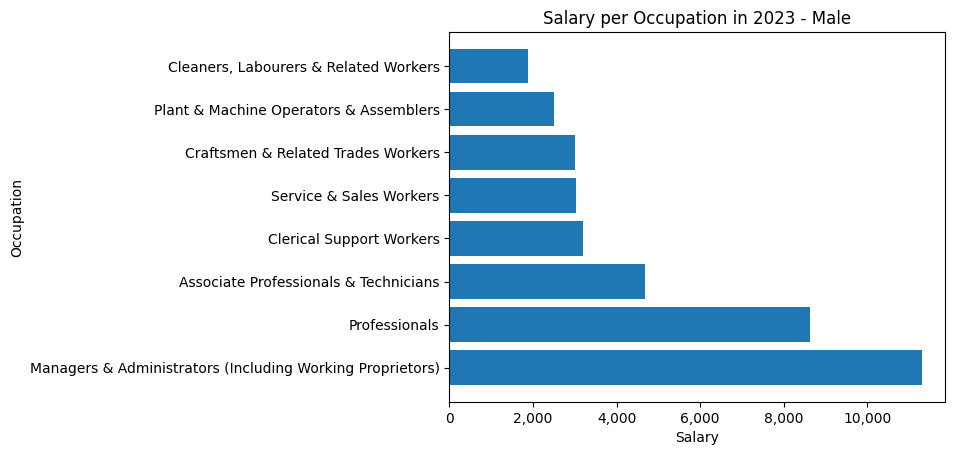

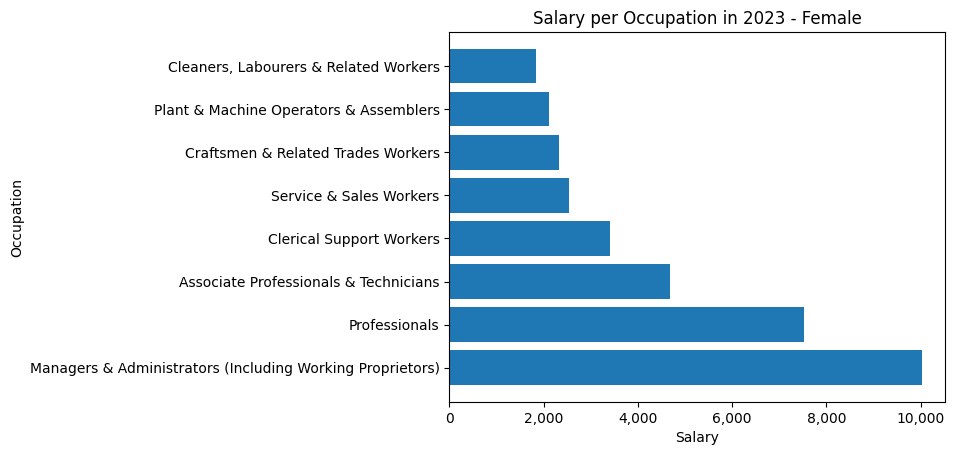

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib.ticker import StrMethodFormatter


## Last-Year Salary by Gender
# 1. Find latest year
latest_year = df["year"].max()

# 2. Salary by occupation in most recent year, broken down by gender
latest_rank_m = (
    df[(df["year"] == latest_year) & (df["gender"] == "Male")]
    .sort_values("value", ascending=False)
    [["occupation", "value"]]
)
latest_rank_f = (
    df[(df["year"] == latest_year) & (df["gender"] == "Female")]
    .sort_values("value", ascending=False)
    [["occupation", "value"]]
)

plt.barh(latest_rank_m["occupation"], latest_rank_m["value"])
plt.title(f"Salary per Occupation in {latest_year} - Male")
plt.xlabel('Salary')
plt.ylabel('Occupation')
plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}')) # ensure x-axis appears in thousands format
plt.show()

plt.barh(latest_rank_f["occupation"], latest_rank_f["value"])
plt.title(f"Salary per Occupation in {latest_year} - Female")
plt.xlabel('Salary')
plt.ylabel('Occupation')
plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}')) # ensure x-axis appears in thousands format
plt.show()
# As expected, Managers & Administrators are paid the highest, followed by Professionals, which are more than twice compared to the third highest occupation - Associal Professionals & Technicians.
# Meanwhile, Cleaners, Labourers & Related Workers are paid the lowest, with most other professions hovering around 3,000 SGD
# This trend remains consistent among both genders.

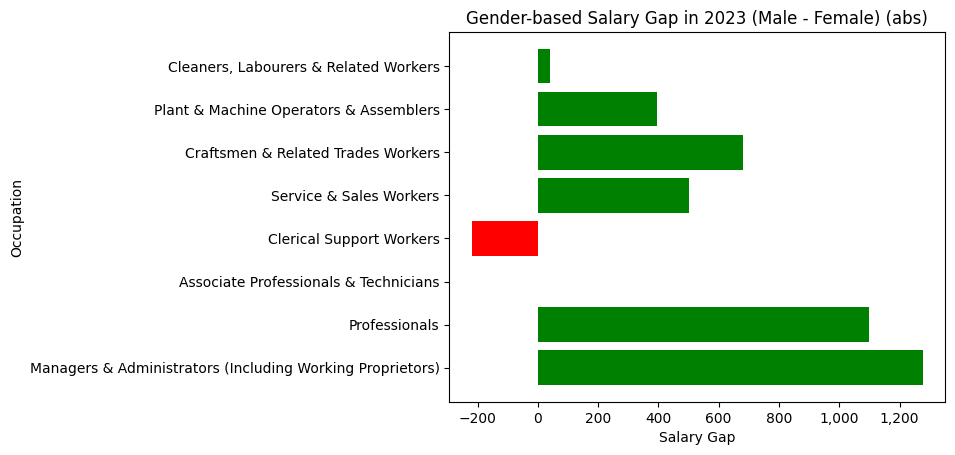

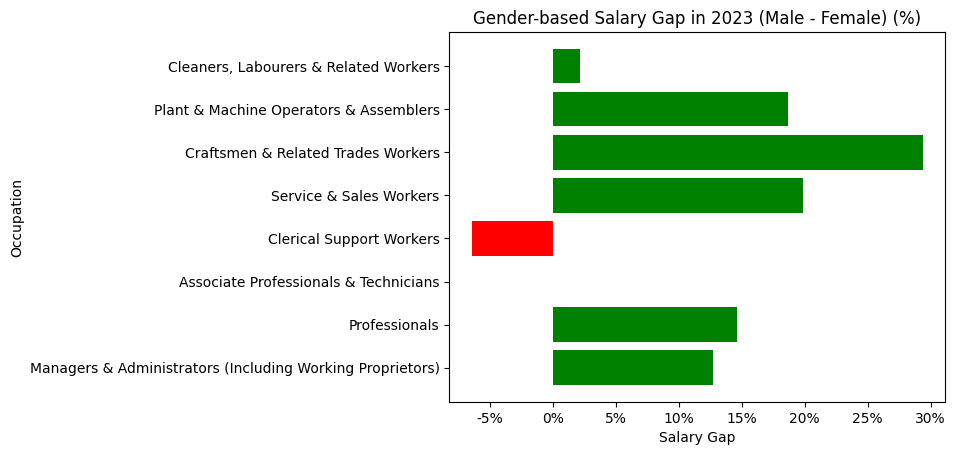

In [ ]:
## Last-Year Salary by Gender
# 1. Find latest year
latest_year = df["year"].max()

# 2. Salary by occupation in most recent year, broken down by gender
latest_rank_m = (
    df[(df["year"] == latest_year) & (df["gender"] == "Male")]
    .sort_values("value", ascending=False)
    [["occupation", "value"]]
)
latest_rank_f = (
    df[(df["year"] == latest_year) & (df["gender"] == "Female")]
    .sort_values("value", ascending=False)
    [["occupation", "value"]]
)

# 3. Merge & calculate gender salary gap
latest_salary_gap = latest_rank_m.merge(latest_rank_f, how='left', on='occupation', suffixes=('_m', '_f'))
latest_salary_gap["gap"] = latest_salary_gap["value_m"] - latest_salary_gap["value_f"]
latest_salary_gap["gap_pc"] = (latest_salary_gap["value_m"] - latest_salary_gap["value_f"])/latest_salary_gap["value_f"]*100

# 4. Assign bar colors
import numpy as np
colors = np.where(latest_salary_gap["gap"] >= 0, "green", "red") # assign green to values >0, red to  values <0
colors_pc = np.where(latest_salary_gap["gap_pc"] >= 0, "green", "red") # assign green to values >0, red to  values <0

# 5. Plotting
plt.barh(latest_salary_gap["occupation"], latest_salary_gap["gap"], color=colors)
plt.title(f"Gender-based Salary Gap in {latest_year} (Male - Female) (abs)")
plt.xlabel('Salary Gap')
plt.ylabel('Occupation')
plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}')) # ensure x-axis appears in thousands format
plt.show()

plt.barh(latest_salary_gap["occupation"], latest_salary_gap["gap_pc"], color=colors)
plt.title(f"Gender-based Salary Gap in {latest_year} (Male - Female) (%)")
plt.xlabel('Salary Gap')
plt.ylabel('Occupation')
plt.gca().xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x:.0f}%'))
#plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f%}')) # ensure x-axis appears in thousands format
plt.show()

# Most occupations see clear salary gap between male and female workers, with highest absolute gap observed in higher paid professions, namely Professionals and Managers & Administrators.
# In terms of percentage, professions within lower-middle tiers show the highest pay gap (20 - 30%), namely Plant & Machine Operators & Assemblers, Craftsmen & Related Trades Workers, and Services & Sales Workers.
# Clarical Support Workers is the only profession where females earn more by ~220 SGD, while Associate Professionals & Technicals see no difference between male and female workers.

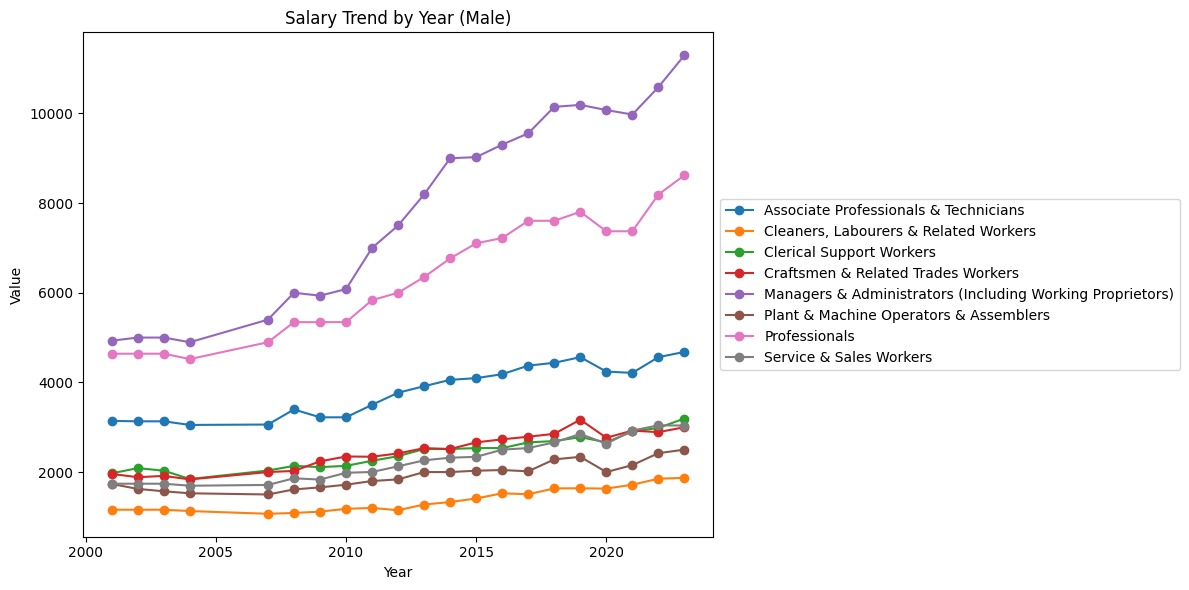

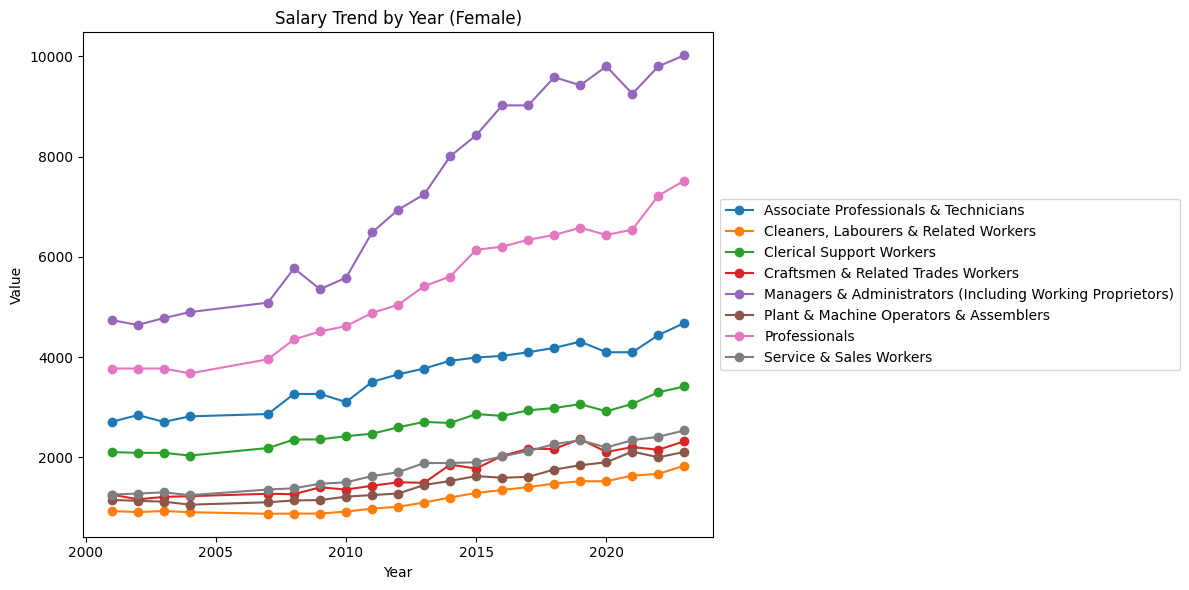

In [ ]:
plt.figure(figsize=(12,6))

# Loop through and draw a line chart for each occupation group:
for occ, group in df[df["gender"]=="Male"].groupby("occupation"):
    plt.plot(group["year"], group["value"], marker="o", label=occ)

plt.title("Salary Trend by Year (Male)")
plt.xlabel("Year")
plt.ylabel("Value")
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

plt.figure(figsize=(12,6))

# Loop through and draw a line chart for each occupation group:
for occ, group in df[df["gender"]=="Female"].groupby("occupation"):
    plt.plot(group["year"], group["value"], marker="o", label=occ)

plt.title("Salary Trend by Year (Female)")
plt.xlabel("Year")
plt.ylabel("Value")
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

# All professions see year-on-year growth at different rates.
# While aggressive growth rate has been observed for Professionals and Managers & Administrators, the rest see gradual growth only.

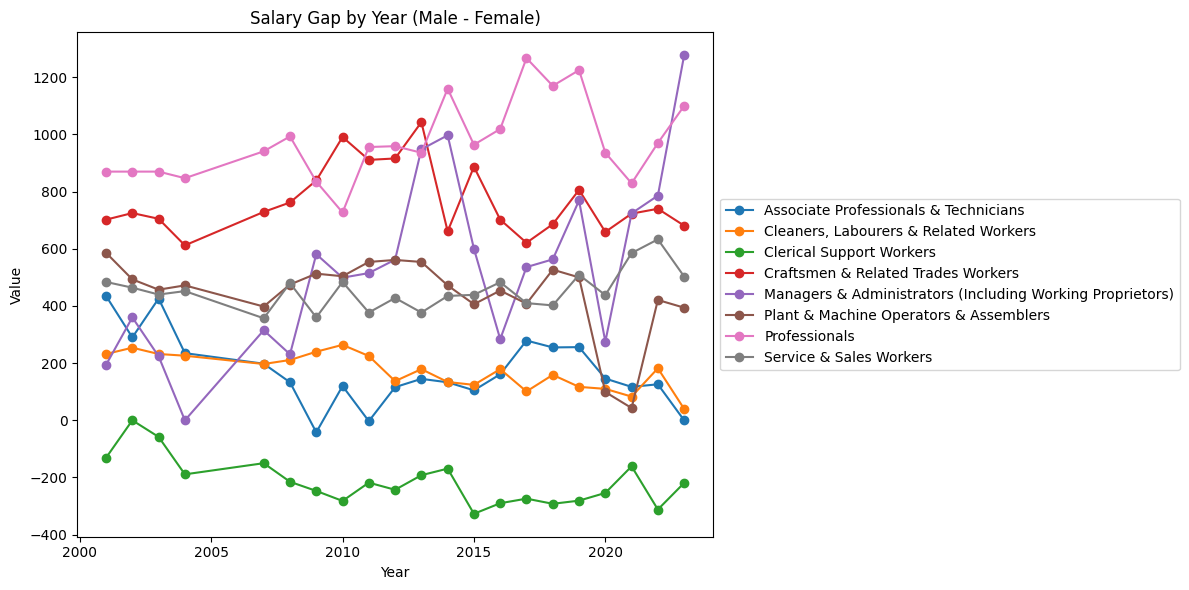

In [ ]:
# 3. Merge & calculate gender salary gap
salary_gap = df[df["gender"]=="Male"].merge(df[df["gender"]=="Female"], how='left', on=('occupation','year'), suffixes=('_m', '_f'))
salary_gap["gap"] = salary_gap["value_m"] - salary_gap["value_f"]

# 4. Assign bar colors
import numpy as np
colors = np.where(salary_gap["gap"] >= 0, "green", "red") # assign green to values >0, red to  values <0

plt.figure(figsize=(12,6))

# Loop through and draw a line chart for each occupation group:
for occ, group in salary_gap.groupby("occupation"):
    plt.plot(group["year"], group["gap"], marker="o", label=occ)

plt.title("Salary Gap by Year (Male - Female)")
plt.xlabel("Year")
plt.ylabel("Value")
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

# Compared to 2000, salaries in 2025 have seen higher gender pay gap specifically for high-salary professions such as Professionals and Managers & Administrators.
# The rest of the professions see fluctuations but no major changes compared to 2000.